In [63]:
import pandas as pd

In [64]:
data = pd.read_csv('student_success_survey.csv')

In [65]:
data = data[data["pillar"] != "Other"]


In [66]:
data.columns

Index(['student_uid', 'pillar', 'current_term', 'cgpa', 'prereq_ct_grade',
       'used_pytorch_tensorflow', 'used_big_data_tools',
       'diag_python_mod_answer', 'diag_pvalue_answer', 'diag_pca_answer',
       'grit_distracted_by_new_ideas', 'grit_setbacks_dont_discourage_me',
       'grit_short_term_obsession_then_loss', 'grit_i_am_a_hard_worker',
       'grit_i_change_goals', 'grit_i_finish_what_i_begin',
       'cse_debug_python_without_help', 'cse_learn_new_ml_library',
       'cse_explain_model_theory', 'cse_interpret_complex_viz',
       'hours_per_week_planned', 'commute_minutes_daily',
       'team_formed_for_final_project', 'laptop_or_cloud_ready',
       'final_course_score'],
      dtype='object')

In [67]:
data[['pillar', 'current_term', 'cgpa', 'prereq_ct_grade',
       'used_pytorch_tensorflow', 'used_big_data_tools',
       'diag_python_mod_answer', 'diag_pvalue_answer', 'diag_pca_answer']].head()

,pillar,current_term,cgpa,prereq_ct_grade,used_pytorch_tensorflow,used_big_data_tools,diag_python_mod_answer,diag_pvalue_answer,diag_pca_answer
0,ASD,Term 7,4.62,A/A+,Yes,No,Error,Statistically significant (reject H0),Finding eigenvalues and eigenvectors
1,ASD,Term 6,4.00,A-,No,Yes,2,Statistically significant (reject H0),Integration by parts
2,ASD,Term 6,4.13,B+,No,No,2,Statistically significant (reject H0),Finding eigenvalues and eigenvectors
3,ISTD,Term 6,4.69,A/A+,Yes,No,2,Statistically significant (reject H0),Finding eigenvalues and eigenvectors
4,ISTD,Term 7,4.63,A/A+,Yes,No,0.66,96% probability H0 is true,Finding eigenvalues and eigenvectors


In [68]:
data["grit_i_am_a_hard_worker"].value_counts()

grit_i_am_a_hard_worker
3    77
4    54
2    47
1    34
5    24
Name: count, dtype: int64

In [69]:
data["diag_python_mod_answer"].value_counts()

diag_python_mod_answer
2        119
0.66      32
0         31
Error     29
1         25
Name: count, dtype: int64

In [70]:
# data[data["diag_python_mod_answer"]=="Error"]

In [71]:
data["diag_pca_answer"].value_counts()

diag_pca_answer
Finding eigenvalues and eigenvectors    114
Calculating the derivative               45
Integration by parts                     39
Binary tree traversal                    38
Name: count, dtype: int64

In [72]:

data["prereq_ct_grade"].value_counts()

prereq_ct_grade
A/A+           118
A-              46
B+              30
B               21
B-               9
Exempted/Di      8
C+ or lower      4
Name: count, dtype: int64

In [73]:
data["current_term"].value_counts()

current_term
Term 6    129
Term 7     75
Term 8     32
Name: count, dtype: int64

In [74]:
data[['grit_distracted_by_new_ideas', 'grit_setbacks_dont_discourage_me',
       'grit_short_term_obsession_then_loss', 'grit_i_am_a_hard_worker',
       'grit_i_change_goals', 'grit_i_finish_what_i_begin',
       'cse_debug_python_without_help', 'cse_learn_new_ml_library']].head()

,grit_distracted_by_new_ideas,grit_setbacks_dont_discourage_me,grit_short_term_obsession_then_loss,grit_i_am_a_hard_worker,grit_i_change_goals,grit_i_finish_what_i_begin,cse_debug_python_without_help,cse_learn_new_ml_library
0,3,3,2,4,3,4,3,5
1,4,3,4,3,3,3,4,3
2,3,4,2,2,4,1,5,4
3,4,2,4,2,5,3,3,4
4,2,4,4,3,2,2,4,4


In [75]:

data[['cse_explain_model_theory', 'cse_interpret_complex_viz',
       'hours_per_week_planned', 'commute_minutes_daily',
       'team_formed_for_final_project', 'laptop_or_cloud_ready'
]].head()

,cse_explain_model_theory,cse_interpret_complex_viz,hours_per_week_planned,commute_minutes_daily,team_formed_for_final_project,laptop_or_cloud_ready
0,3,3,7.0,21.0,Yes,Yes
1,3,4,6.0,63.0,No,Yes
2,4,5,8.0,60.0,Yes,Yes
3,3,2,3.0,31.0,Yes,Yes
4,4,5,7.0,15.0,Yes,Yes


In [76]:
data["pillar"].value_counts()

pillar
ISTD    84
ESD     62
EPD     37
DAI     28
ASD     25
Name: count, dtype: int64

In [77]:
# Assuming df is your dataframe and 'Final_Score' is your target
features = [
    'used_pytorch_tensorflow', 
    'used_big_data_tools', 
    'team_formed_for_final_project', 
    'laptop_or_cloud_ready'
]

global_avg = data['final_course_score'].mean()

print(f"--- GLOBAL BASELINE SCORE: {global_avg:.2f} ---\n")

for feat in features:
    # GroupBy logic
    report = data.groupby(feat)['final_course_score'].agg(['mean', 'std', 'count']).rename(columns={'mean': 'Avg_Score'})
    
    # Expert Metrics
    report['Point_Lift'] = report['Avg_Score'] - global_avg
    report['Reliability'] = (report['std'] / report['Avg_Score']) * 100 # Coefficient of Variation %
    
    print(f"FEATURE: {feat}")
    print(report.sort_values(by='Point_Lift', ascending=False))
    print("-" * 30)

--- GLOBAL BASELINE SCORE: 70.25 ---

FEATURE: used_pytorch_tensorflow
                         Avg_Score        std  count  Point_Lift  Reliability
used_pytorch_tensorflow                                                      
Yes                      72.985246  10.524695    122    2.739907    14.420305
No                       67.313158  11.995681    114   -2.932181    17.820708
------------------------------
FEATURE: used_big_data_tools
                     Avg_Score        std  count  Point_Lift  Reliability
used_big_data_tools                                                      
Yes                  71.336957   8.369106     46    1.091618    11.731796
No                   69.981053  12.245157    190   -0.264286    17.497818
------------------------------
FEATURE: team_formed_for_final_project
                               Avg_Score        std  count  Point_Lift  \
team_formed_for_final_project                                            
Yes                            70.805147  1

In [78]:
def get_honours(cgpa):
    if 4.50 <= cgpa <= 5.00:
        return "Honours with Highest Distinction"
    elif 4.00 <= cgpa <= 4.49:
        return "Honours with Distinction"
    elif 3.50 <= cgpa <= 3.99:
        return "Honours with Merit"
    elif 3.00 <= cgpa <= 3.49:
        return "Honours"
    elif 2.00 <= cgpa <= 2.99:
        return "Pass"
    else:
        return None  # or handle out-of-range values

In [79]:
data['honours'] = data['cgpa'].apply(get_honours)

In [80]:
data['honours'].value_counts() 

honours
Honours with Distinction            102
Honours with Merit                   50
Honours with Highest Distinction     48
Honours                              16
Pass                                  1
Name: count, dtype: int64

In [81]:


# Your multi-class feature list
multiclass_features = [
    'pillar', 'current_term', 'prereq_ct_grade', 
    'diag_python_mod_answer', 'diag_pvalue_answer', 'diag_pca_answer', 
    'grit_distracted_by_new_ideas', 'grit_setbacks_dont_discourage_me',
    'grit_short_term_obsession_then_loss', 'grit_i_am_a_hard_worker',
    'grit_i_change_goals', 'grit_i_finish_what_i_begin',
    'cse_debug_python_without_help', 'cse_learn_new_ml_library', 
    'cse_explain_model_theory', 'cse_interpret_complex_viz', 'honours'
]

target = 'final_course_score'
global_mean = data["final_course_score"].mean()

def analyze_all_multiclass(df, features, target):
    results = {}
    
    for feat in features:
        # 1. Basic Aggregation
        # observed=True ensures we don't look at empty categories
        analysis = df.groupby(feat, observed=True)[target].agg(['mean', 'std', 'count'])
        
        # 2. Expert Metrics
        analysis['Point_Lift'] = analysis['mean'] - global_mean
        analysis['Reliability'] = (analysis['std'] / analysis['mean']) * 100
        
        # 3. Spread Analysis (The 'Expert' filter)
        # Calculates the gap between the best performing and worst performing label
        label_spread = analysis['mean'].max() - analysis['mean'].min()
        
        results[feat] = {
            'data': analysis.sort_values(by='mean', ascending=False),
            'spread': label_spread
        }

        print(f"FEATURE: {feat} | Label Spread: {label_spread:.2f}")
        
    return results

# Run Analysis
all_analyses = analyze_all_multiclass(data, multiclass_features, target)

# Print a specific example (e.g., Pillar)
# print(f"--- GLOBAL MEAN: {global_mean:.2f} ---")
# print(all_analyses['pillar']['data'])

FEATURE: pillar | Label Spread: 6.65
FEATURE: current_term | Label Spread: 1.09
FEATURE: prereq_ct_grade | Label Spread: 17.93
FEATURE: diag_python_mod_answer | Label Spread: 10.12
FEATURE: diag_pvalue_answer | Label Spread: 9.26
FEATURE: diag_pca_answer | Label Spread: 9.40
FEATURE: grit_distracted_by_new_ideas | Label Spread: 9.30
FEATURE: grit_setbacks_dont_discourage_me | Label Spread: 9.11
FEATURE: grit_short_term_obsession_then_loss | Label Spread: 13.60
FEATURE: grit_i_am_a_hard_worker | Label Spread: 6.98
FEATURE: grit_i_change_goals | Label Spread: 8.42
FEATURE: grit_i_finish_what_i_begin | Label Spread: 9.35
FEATURE: cse_debug_python_without_help | Label Spread: 12.33
FEATURE: cse_learn_new_ml_library | Label Spread: 12.30
FEATURE: cse_explain_model_theory | Label Spread: 7.95
FEATURE: cse_interpret_complex_viz | Label Spread: 15.47
FEATURE: honours | Label Spread: 20.50


In [82]:
# Identify which feature creates the biggest difference in final scores
impact_ranking = {f: all_analyses[f]['spread'] for f in multiclass_features}
sorted_impact = sorted(impact_ranking.items(), key=lambda x: x[1], reverse=True)

print("Features ranked by Mean Score Spread (Max - Min):")
for feat, spread in sorted_impact:
    print(f"{feat}: {spread:.2f} point difference between best and worst label")

Features ranked by Mean Score Spread (Max - Min):
honours: 20.50 point difference between best and worst label
prereq_ct_grade: 17.93 point difference between best and worst label
cse_interpret_complex_viz: 15.47 point difference between best and worst label
grit_short_term_obsession_then_loss: 13.60 point difference between best and worst label
cse_debug_python_without_help: 12.33 point difference between best and worst label
cse_learn_new_ml_library: 12.30 point difference between best and worst label
diag_python_mod_answer: 10.12 point difference between best and worst label
diag_pca_answer: 9.40 point difference between best and worst label
grit_i_finish_what_i_begin: 9.35 point difference between best and worst label
grit_distracted_by_new_ideas: 9.30 point difference between best and worst label
diag_pvalue_answer: 9.26 point difference between best and worst label
grit_setbacks_dont_discourage_me: 9.11 point difference between best and worst label
grit_i_change_goals: 8.42 point

In [83]:

import numpy as np
from scipy import stats

# 1. Pearson Correlation for Continuous CGPA
cgpa_corr = data['cgpa'].corr(data['final_course_score'])

# 2. ANOVA (Analysis of Variance) for Categorical Honours
# This tells us how much of the score's variance is explained by the honours categories
groups = [group['final_course_score'].values for name, group in data.groupby('honours', observed=True)]
f_stat, p_val = stats.f_oneway(*groups)

# 3. Spread Comparison
honours_spread = data.groupby('honours', observed=True)['final_course_score'].mean().max() - \
                 data.groupby('honours', observed=True)['final_course_score'].mean().min()

print(f"--- Comparison Report ---")
print(f"CGPA (Continuous) Correlation: {cgpa_corr:.4f}")
print(f"Honours (Categorical) F-Statistic: {f_stat:.4f} (p-value: {p_val:.4g})")
print(f"Honours Category Max Spread: {honours_spread:.2f} points")

--- Comparison Report ---
CGPA (Continuous) Correlation: 0.5742
Honours (Categorical) F-Statistic: 17.3163 (p-value: 2.62e-12)
Honours Category Max Spread: 20.50 points


In [84]:
data['grit_i_change_goals_inv'] = 6 - data['grit_i_change_goals']
data['grit_short_term_obsession_inv'] = 6 - data['grit_short_term_obsession_then_loss']
data['grit_distracted_inv'] = 6 - data['grit_distracted_by_new_ideas']

grit_cols = [
    'grit_setbacks_dont_discourage_me', 'grit_i_am_a_hard_worker', 
    'grit_i_finish_what_i_begin', 'grit_i_change_goals_inv', 
    'grit_short_term_obsession_inv', 'grit_distracted_inv'
]
data['total_grit_score'] = data[grit_cols].mean(axis=1)

In [85]:
# Example: 1 for correct answer, 0 for incorrect/partial
data['tech_knowledge_score'] = (
    (data['diag_python_mod_answer'] == 'Correct').astype(int) +
    (data['diag_pvalue_answer'] == 'Correct').astype(int) +
    (data['diag_pca_answer'] == 'Correct').astype(int)
)

In [86]:
# Convert commute to weekly hours (assuming 5 days)
data['weekly_commute_hours'] = (data['commute_minutes_daily'] * 5) / 60
data['study_friction_index'] = data['weekly_commute_hours'] / (data['hours_per_week_planned'] + 1)

In [87]:
# Simple version: Compare Python Self-Efficacy to Python Diagnostic
data['python_confidence_gap'] = data['cse_debug_python_without_help'] - data['tech_knowledge_score']

In [88]:
neg_grit = ['grit_i_change_goals', 'grit_short_term_obsession_then_loss', 'grit_distracted_by_new_ideas']
pos_grit = ['grit_setbacks_dont_discourage_me', 'grit_i_am_a_hard_worker', 'grit_i_finish_what_i_begin']

for col in neg_grit:
    data[f'{col}_inv'] = 6 - data[col]

grit_cols_final = pos_grit + [f'{col}_inv' for col in neg_grit]
data['total_grit_score'] = data[grit_cols_final].mean(axis=1)

# Diagnostic Power Score: Count 'Correct' answers

# Logistical Friction: Weekly Commute / (Planned Hours + 1)
data['weekly_commute_hours'] = (data['commute_minutes_daily'] * 5) / 60
data['study_friction_index'] = data['weekly_commute_hours'] / (data['hours_per_week_planned'] + 1)


new_features = ['total_grit_score',  'study_friction_index']
correlations = data[new_features + ['final_course_score']].corr()['final_course_score'].sort_values(ascending=False)

print("--- Correlation of Engineered Features with Final_Score ---")
print(correlations.drop('final_course_score'))

--- Correlation of Engineered Features with Final_Score ---
total_grit_score        0.29280
study_friction_index   -0.20542
Name: final_course_score, dtype: float64


In [89]:

# 1. Clean the MCQ columns and handle the 'Error' values
diag_cols = ['diag_python_mod_answer', 'diag_pvalue_answer', 'diag_pca_answer']

for col in diag_cols:
    # Treat 'Error' as its own valid category/label
    data[col] = data[col].fillna('Error').astype(str)
    data[col] = data[col].replace(['error', 'Error', 'nan'], 'Error')

# 2. Automatically identify the "High-Performer Choice" for each question
def get_best_option_score(df, col, target):
    # Find which label corresponds to the highest average score
    # We only consider labels with at least 5 students to avoid noise
    group_stats = df.groupby(col)[target].agg(['mean', 'count'])
    reliable_groups = group_stats[group_stats['count'] >= 5]
    
    if not reliable_groups.empty:
        best_option = reliable_groups['mean'].idxmax()
    else:
        best_option = group_stats['mean'].idxmax()
        
    return (df[col] == best_option).astype(int), best_option

# 3. Create the features
best_options = {}
for col in diag_cols:
    data[f'matches_best_{col}'], best_options[col] = get_best_option_score(data, col, 'final_course_score')

# 4. Final Engineered Feature: Total alignment with high-performers
data['hidden_knowledge_score'] = data[[f'matches_best_{col}' for col in diag_cols]].sum(axis=1)

# Display which MCQ values were "discovered" as the best
print("Identified 'Best' MCQ Options based on Student Performance:")
for col, val in best_options.items():
    print(f"- {col}: Option '{val}' correlates with highest scores.")

Identified 'Best' MCQ Options based on Student Performance:
- diag_python_mod_answer: Option '2' correlates with highest scores.
- diag_pvalue_answer: Option 'Statistically significant (reject H0)' correlates with highest scores.
- diag_pca_answer: Option 'Finding eigenvalues and eigenvectors' correlates with highest scores.


In [90]:
correlation = data['hidden_knowledge_score'].corr(data['final_course_score'])
print(f"Correlation of 'Hidden Knowledge' with Final Score: {correlation:.4f}")

Correlation of 'Hidden Knowledge' with Final Score: 0.5096


In [91]:
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

grit_scaled = min_max_scale(data['total_grit_score'])

friction_inverted_scaled = min_max_scale(1 - data['study_friction_index'])

# The Interaction: Product of Grit and Inverted Friction
# High Score = High Grit + Low Logistical Friction (The "Ideal" Student)
# Low Score = Low Grit + High Logistical Friction (The "High Risk" Student)
data['grit_friction_resilience'] = grit_scaled * friction_inverted_scaled

# Check the correlation of this new interaction
interaction_corr = data['grit_friction_resilience'].corr(data['final_course_score'])
print(f"Correlation of Grit-Friction Interaction: {interaction_corr:.4f}")

Correlation of Grit-Friction Interaction: 0.2870


In [92]:
def classify_year(term):
    if term == "Term 6":
        return "3rd year student"
    else:
        return "final year"

data["student_year"] = data["current_term"].apply(classify_year)

In [93]:
data["student_year"].value_counts()

student_year
3rd year student    129
final year          107
Name: count, dtype: int64

In [94]:
data["pillar year"] = data["pillar"] + data["student_year"]

In [95]:
data["pillar year"].value_counts() 

pillar year
ISTD3rd year student    43
ISTDfinal year          41
ESD3rd year student     40
ESDfinal year           22
EPD3rd year student     19
EPDfinal year           18
DAIfinal year           14
DAI3rd year student     14
ASD3rd year student     13
ASDfinal year           12
Name: count, dtype: int64

In [96]:
from scipy import stats

def test_categorical_importance(df, feature, target):
    # 1. Group by the new combined feature
    groups = df.groupby(feature, observed=True)[target]
    
    # 2. ANOVA Test: Is there a statistically significant difference between these groups?
    # We drop groups with only 1 member to avoid math errors
    filtered_groups = [group.values for name, group in groups if len(group) > 1]
    f_stat, p_val = stats.f_oneway(*filtered_groups)
    
    # 3. Calculate Mean Spread (The "Impact" Metric)
    means = groups.mean()
    spread = means.max() - means.min()
    
    return {
        'F-Statistic': f_stat,
        'p-value': p_val,
        'Mean Spread': spread,
        'Group Means': means.sort_values(ascending=False)
    }

# Run the test for the new feature and the original ones for comparison
results_combined = test_categorical_importance(data, 'pillar year', 'final_course_score')
results_pillar = test_categorical_importance(data, 'pillar', 'final_course_score')

print(f"--- Feature Comparison ---")
print(f"Original 'Pillar' Spread: {results_pillar['Mean Spread']:.2f}")
print(f"New 'Pillar Year' Spread: {results_combined['Mean Spread']:.2f}")
print(f"ANOVA p-value for 'Pillar Year': {results_combined['p-value']:.4g}")
print("\nTop Performing Combined Groups:")
print(results_combined['Group Means'].head())

--- Feature Comparison ---
Original 'Pillar' Spread: 6.65
New 'Pillar Year' Spread: 14.47
ANOVA p-value for 'Pillar Year': 0.03245

Top Performing Combined Groups:
pillar year
DAIfinal year           78.121429
ASDfinal year           75.166667
ISTDfinal year          71.712195
ISTD3rd year student    71.516279
ASD3rd year student     70.053846
Name: final_course_score, dtype: float64


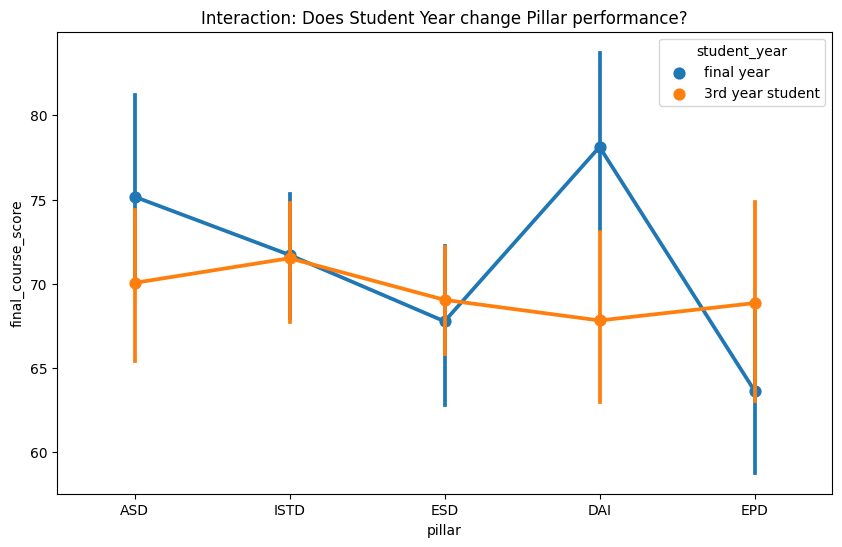

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.pointplot(x='pillar', y='final_course_score', hue='student_year', data=data)
plt.title("Interaction: Does Student Year change Pillar performance?")
plt.show()

In [99]:
data.columns

Index(['student_uid', 'pillar', 'current_term', 'cgpa', 'prereq_ct_grade',
       'used_pytorch_tensorflow', 'used_big_data_tools',
       'diag_python_mod_answer', 'diag_pvalue_answer', 'diag_pca_answer',
       'grit_distracted_by_new_ideas', 'grit_setbacks_dont_discourage_me',
       'grit_short_term_obsession_then_loss', 'grit_i_am_a_hard_worker',
       'grit_i_change_goals', 'grit_i_finish_what_i_begin',
       'cse_debug_python_without_help', 'cse_learn_new_ml_library',
       'cse_explain_model_theory', 'cse_interpret_complex_viz',
       'hours_per_week_planned', 'commute_minutes_daily',
       'team_formed_for_final_project', 'laptop_or_cloud_ready',
       'final_course_score', 'honours', 'grit_i_change_goals_inv',
       'grit_short_term_obsession_inv', 'grit_distracted_inv',
       'total_grit_score', 'tech_knowledge_score', 'weekly_commute_hours',
       'study_friction_index', 'python_confidence_gap',
       'grit_short_term_obsession_then_loss_inv',
       'grit_distrac

In [ ]:
final_features = [
    # Continuous
    'cgpa', 
    'total_grit_score', 
    'study_friction_index', 
    'python_confidence_gap',
    'hidden_knowledge_score',
    "used_pytorch_tensorflow",
    "laptop_or_cloud_ready",
    # Categorical
    'prereq_ct_grade',
    'pillar year'
]

# Target
target = 'final_course_score'

X = data[final_features]
y = data[target]

In [100]:
# Select only the final candidates
final_candidates = [
    'cgpa', 'total_grit_score', 'study_friction_index', 
    'python_confidence_gap', 'hidden_knowledge_score'
]

# Create a correlation matrix
corr_matrix = data[final_candidates].corr()

# Expert Rule: If any two features have r > 0.7, consider dropping the weaker one.
print("--- Final Multicollinearity Check ---")
print(corr_matrix)

--- Final Multicollinearity Check ---
                            cgpa  total_grit_score  study_friction_index  \
cgpa                    1.000000         -0.002570              0.004306   
total_grit_score       -0.002570          1.000000             -0.325338   
study_friction_index    0.004306         -0.325338              1.000000   
python_confidence_gap   0.290587          0.032861             -0.181654   
hidden_knowledge_score  0.347953         -0.029129             -0.016154   

                        python_confidence_gap  hidden_knowledge_score  
cgpa                                 0.290587                0.347953  
total_grit_score                     0.032861               -0.029129  
study_friction_index                -0.181654               -0.016154  
python_confidence_gap                1.000000                0.226620  
hidden_knowledge_score               0.226620                1.000000  


In [ ]:
# error_impact = data.groupby('diagnostic_error_flag')['Final_Score'].agg(['mean', 'count', 'std'])
# print("\nImpact of encountering an 'Error' in Diagnostics:")
# print(error_impact)

In [98]:
# drop team_formed_for_final_project   